<a href="https://colab.research.google.com/github/Minach2002/deep-learning-projects/blob/main/speech_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.5 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import torch
import torchaudio
from transformers import Wav2Vec2Processor
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
audio_dataset='/content/drive/My Drive/tess-1/TESS'


In [ ]:
paths = []
labels = []

for subfolders in os.listdir(audio_dataset):
  os.path.join(audio_dataset, subfolders)
  subfolder_path =os.path.join(audio_dataset, subfolders)

  if(os.path.isdir(subfolder_path)):
    for file_name in os.listdir(subfolder_path):
      if(file_name.endswith('.wav')):
        file_path = os.path.join(subfolder_path, file_name)
        paths.append(file_path)
        labels.append(subfolders)

print(f"Total lenght:{len(paths)}")
print(f"Sample paths: {paths[:5]}")
print(f"Sample labels: {labels[:5]}")

Total lenght:2800
Sample paths: ['/content/drive/My Drive/tess-1/TESS/fear/YAF_time_fear.wav', '/content/drive/My Drive/tess-1/TESS/fear/YAF_wash_fear.wav', '/content/drive/My Drive/tess-1/TESS/fear/YAF_vine_fear.wav', '/content/drive/My Drive/tess-1/TESS/fear/YAF_take_fear.wav', '/content/drive/My Drive/tess-1/TESS/fear/YAF_sub_fear.wav']
Sample labels: ['fear', 'fear', 'fear', 'fear', 'fear']


In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['labels'] = labels
df.head()


,speech,labels
0,/content/drive/My Drive/tess-1/TESS/fear/YAF_t...,fear
1,/content/drive/My Drive/tess-1/TESS/fear/YAF_w...,fear
2,/content/drive/My Drive/tess-1/TESS/fear/YAF_v...,fear
3,/content/drive/My Drive/tess-1/TESS/fear/YAF_t...,fear
4,/content/drive/My Drive/tess-1/TESS/fear/YAF_s...,fear


In [ ]:
df.tail()

,speech,labels
2795,/content/drive/My Drive/tess-1/TESS/pleasant_s...,pleasant_surprised
2796,/content/drive/My Drive/tess-1/TESS/pleasant_s...,pleasant_surprised
2797,/content/drive/My Drive/tess-1/TESS/pleasant_s...,pleasant_surprised
2798,/content/drive/My Drive/tess-1/TESS/pleasant_s...,pleasant_surprised
2799,/content/drive/My Drive/tess-1/TESS/pleasant_s...,pleasant_surprised


In [ ]:
df.value_counts('labels')

,count
labels,
angry,400
disgust,400
fear,400
happy,400
neutral,400
pleasant_surprised,400
sad,400


<Axes: xlabel='count', ylabel='labels'>

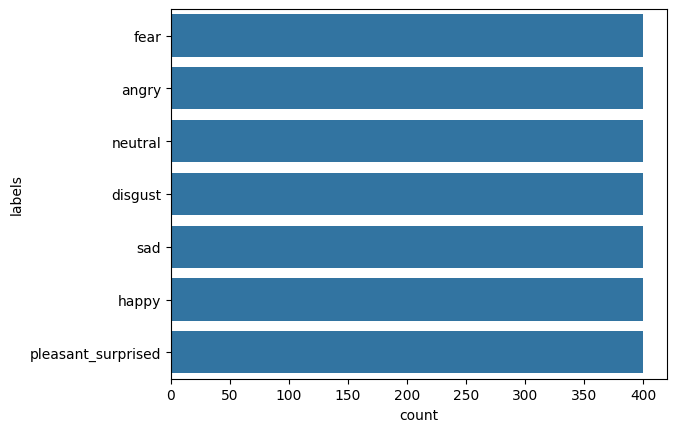

In [ ]:
sns.countplot(df['labels'])

In [ ]:
import librosa

# Load an audio file
file_path = '/content/drive/My Drive/tess-1/TESS/angry/OAF_back_angry.wav'
data, sr = librosa.load(file_path, sr=None)

# Print the waveform and sample rate
print("Sample Rate (sr):", sr)
print("Waveform Data (first 10 samples):", data[:10])  # Print first 10 samples for readability
print("Total Samples in Audio:", len(data))


Sample Rate (sr): 24414
Waveform Data (first 10 samples): [ 0.0000000e+00 -1.8310547e-04 -2.7465820e-04 -2.4414062e-04
 -2.1362305e-04 -2.1362305e-04 -9.1552734e-05 -2.1362305e-04
 -2.7465820e-04 -3.3569336e-04]
Total Samples in Audio: 37574


In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

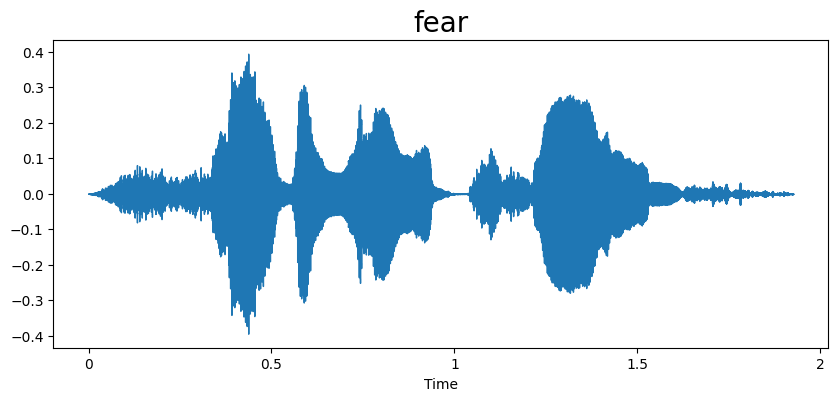

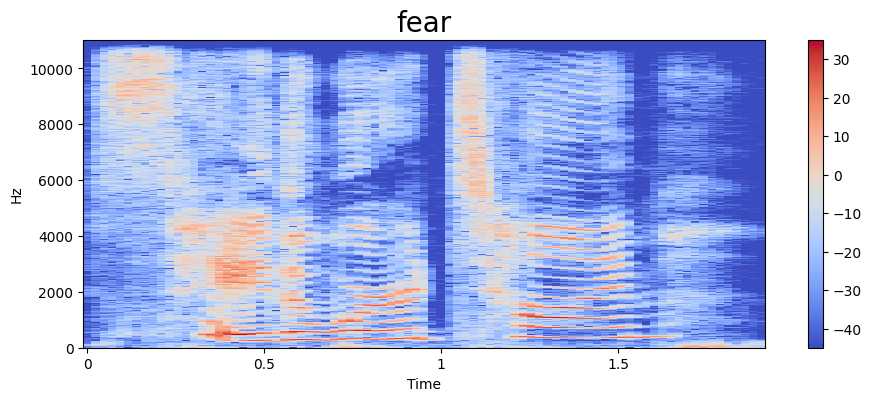

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

preprocess

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import soundfile as sf


paths = []
labels = []
preprocessed_paths = []

for subfolder in os.listdir(audio_dataset):
    subfolder_path = os.path.join(audio_dataset, subfolder)

    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.wav'):

                file_path = os.path.join(subfolder_path, filename)


                data, sr = librosa.load(file_path, sr=None)


                data = librosa.resample(data, orig_sr=sr, target_sr=16000)


                if len(data.shape) > 1:
                    data = librosa.to_mono(data)


                data = data / np.max(np.abs(data))



In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import soundfile as sf

# Path to the dataset
audio_dataset = '/content/drive/My Drive/tess-1/TESS'

# Output directory for preprocessed files
output_dir = '/content/drive/My Drive/tess-1/TESS_preprocessed'
os.makedirs(output_dir, exist_ok=True)

# Initialize lists to store paths, labels, and preprocessed paths
paths = []
labels = []
preprocessed_paths = []

# Loop through the dataset directory
for subfolder in os.listdir(audio_dataset):
    subfolder_path = os.path.join(audio_dataset, subfolder)

    if os.path.isdir(subfolder_path):
        # Create a subfolder in the output directory for this label
        output_subfolder = os.path.join(output_dir, subfolder)
        os.makedirs(output_subfolder, exist_ok=True)

        for filename in os.listdir(subfolder_path):
            if filename.endswith('.wav'):
                file_path = os.path.join(subfolder_path, filename)

                try:
                    # Load the audio file
                    data, sr = librosa.load(file_path, sr=None)

                    # Resample to 16,000 Hz
                    data = librosa.resample(data, orig_sr=sr, target_sr=16000)

                    # Convert stereo to mono (if necessary)
                    if len(data.shape) > 1:
                        data = librosa.to_mono(data)

                    # Normalize the audio
                    data = data / np.max(np.abs(data))

                    # Save the preprocessed file in the corresponding subfolder
                    output_filename = f"{subfolder}_{filename}"
                    output_path = os.path.join(output_subfolder, output_filename)
                    sf.write(output_path, data, 16000)

                    # Append to lists
                    paths.append(file_path)
                    labels.append(subfolder)
                    preprocessed_paths.append(output_path)

                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")

# Create a DataFrame to store metadata
df = pd.DataFrame({
    'original_path': paths,
    'label': labels,
    'preprocessed_path': preprocessed_paths
})

# Save the DataFrame to a CSV file
metadata_path = os.path.join(output_dir, 'metadata.csv')
df.to_csv(metadata_path, index=False)
print("Metadata CSV file saved.")

# Print the first few rows of the DataFrame
print(df.head())

Metadata CSV file saved.
                                       original_path label  \
0  /content/drive/My Drive/tess-1/TESS/fear/YAF_t...  fear   
1  /content/drive/My Drive/tess-1/TESS/fear/YAF_w...  fear   
2  /content/drive/My Drive/tess-1/TESS/fear/YAF_v...  fear   
3  /content/drive/My Drive/tess-1/TESS/fear/YAF_t...  fear   
4  /content/drive/My Drive/tess-1/TESS/fear/YAF_s...  fear   

                                   preprocessed_path  
0  /content/drive/My Drive/tess-1/TESS_preprocess...  
1  /content/drive/My Drive/tess-1/TESS_preprocess...  
2  /content/drive/My Drive/tess-1/TESS_preprocess...  
3  /content/drive/My Drive/tess-1/TESS_preprocess...  
4  /content/drive/My Drive/tess-1/TESS_preprocess...  


In [ ]:
print(df.head())

                                       original_path label  \
0  /content/drive/My Drive/tess-1/TESS/fear/YAF_t...  fear   
1  /content/drive/My Drive/tess-1/TESS/fear/YAF_w...  fear   
2  /content/drive/My Drive/tess-1/TESS/fear/YAF_v...  fear   
3  /content/drive/My Drive/tess-1/TESS/fear/YAF_t...  fear   
4  /content/drive/My Drive/tess-1/TESS/fear/YAF_s...  fear   

                                   preprocessed_path  
0  /content/drive/My Drive/tess-1/TESS_preprocess...  
1  /content/drive/My Drive/tess-1/TESS_preprocess...  
2  /content/drive/My Drive/tess-1/TESS_preprocess...  
3  /content/drive/My Drive/tess-1/TESS_preprocess...  
4  /content/drive/My Drive/tess-1/TESS_preprocess...  


In [ ]:


file_path = '/content/drive/My Drive/tess-1/TESS/neutral/OAF_back_neutral.wav'
data, sr = librosa.load(file_path, sr=None)

print(f"Sample Rate (sr): {sr} Hz")


max_amplitude = np.max(np.abs(data))
is_normalized = max_amplitude <= 1.0

print(f"Is Normalized: {is_normalized} (Max Amplitude: {max_amplitude})")


if len(data.shape) > 1:
    num_channels = data.shape[0]
    print(f"Audio is Stereo with {num_channels} channels.")
else:
    print("Audio is Mono.")

Sample Rate (sr): 24414 Hz
Is Normalized: True (Max Amplitude: 0.046875)
Audio is Mono.


<ipython-input-44-82e82c240f43>:1: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  df['duration'] = df['preprocessed_path'].apply(lambda x: librosa.get_duration(filename=x))


count    5600.000000
mean        2.055157
std         0.320778
min         1.254125
25%         1.836422
50%         2.047938
75%         2.277625
max         2.984812
Name: duration, dtype: float64


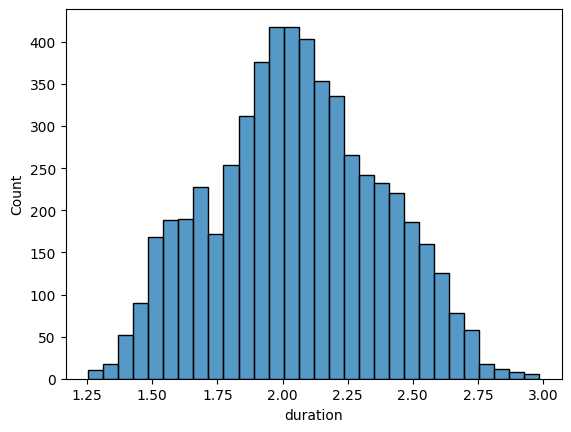

In [ ]:
df['duration'] = df['preprocessed_path'].apply(lambda x: librosa.get_duration(filename=x))
print(df['duration'].describe())
sns.histplot(df['duration'], bins=30)
plt.show()

In [ ]:
def extract_mfcc(file_path, n_mfcc=13):
    data, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)  # Return mean MFCCs across time

def extract_chroma(file_path):
    data, sr = librosa.load(file_path, sr=None)
    chroma = librosa.feature.chroma_stft(y=data, sr=sr)
    return np.mean(chroma.T, axis=0)

def extract_mel_spectrogram(file_path):
    data, sr = librosa.load(file_path, sr=None)
    mel_spec = librosa.feature.melspectrogram(y=data, sr=sr)
    return np.mean(mel_spec.T, axis=0)

In [ ]:
df['mfcc'] = df['preprocessed_path'].apply(extract_mfcc)
df['chroma'] = df['preprocessed_path'].apply(extract_chroma)
df['mel_spectrogram'] = df['preprocessed_path'].apply(extract_mel_spectrogram)